# What impact does race, age, gender and change in certain medications have on average length of stay?

In [1]:
import numpy as np
import pandas as pd  
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
## Previous analysis using groupby and the differnt columns showed "null" values of ? and Unknown/Invalid
missing_values = ["?", "Unknown/Invalid"]
df = pd.read_csv('https://raw.githubusercontent.com/niteen11/DataAnalyticsAcademy/master/Python/dataset_diabetes/diabetic_data.csv',
                 na_values = missing_values)

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [2]:
df.shape

(101766, 50)

In [3]:
df.columns

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

#### Previous Data Analysis Done using groupby to count patient number and each column in the dataset: found null values weight had a large volume of null so I decided to drop. I chose three medications to keep that had a large amount of data: metformin, glipizide, and insulin.

In [4]:
drop_cols = ['glyburide','weight','payer_code', 'num_lab_procedures', 'num_procedures', 'num_medications','diag_1','diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'tolbutamide','pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'glyburide-metformin', 'glipizide-metformin','glimepiride-pioglitazone', 'metformin-rosiglitazone','metformin-pioglitazone']
df.drop(drop_cols, inplace = True, axis=1)

In [5]:
df.tail()

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,medical_specialty,number_outpatient,number_emergency,number_inpatient,metformin,glipizide,insulin,change,diabetesMed,readmitted
101761,443847548,100162476,AfricanAmerican,Male,[70-80),1,3,7,3,NaN,0,0,0,Steady,No,Down,Ch,Yes,>30
101762,443847782,74694222,AfricanAmerican,Female,[80-90),1,4,5,5,NaN,0,0,1,No,No,Steady,No,Yes,NO
101763,443854148,41088789,Caucasian,Male,[70-80),1,1,7,1,NaN,1,0,0,Steady,No,Down,Ch,Yes,NO
101764,443857166,31693671,Caucasian,Female,[80-90),2,3,7,10,Surgery-General,0,0,1,No,Steady,Up,Ch,Yes,NO
101765,443867222,175429310,Caucasian,Male,[70-80),1,1,7,6,NaN,0,0,0,No,No,No,No,No,NO


In [6]:
df.isnull().sum()

encounter_id                    0
patient_nbr                     0
race                         2273
gender                          3
age                             0
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
medical_specialty           49949
number_outpatient               0
number_emergency                0
number_inpatient                0
metformin                       0
glipizide                       0
insulin                         0
change                          0
diabetesMed                     0
readmitted                      0
dtype: int64

In [7]:
## removing rows with no value in race
df_clean = df.dropna(subset=['race'])
df_clean.shape

(99493, 19)

In [8]:
## adding column to define length of stay as short (1-3), medium (4-7) and long (8+)
def stay_length(row):
    if row['time_in_hospital'] <= 3:
        return 'short'
    elif row['time_in_hospital'] > 3 and row['time_in_hospital'] <= 7:
        return 'medium'
    else:
        return 'long'

df_clean['Stay_Length'] = df_clean.apply(lambda row: stay_length(row), axis=1)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


In [9]:
df_clean.columns

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'medical_specialty', 'number_outpatient',
       'number_emergency', 'number_inpatient', 'metformin', 'glipizide',
       'insulin', 'change', 'diabetesMed', 'readmitted', 'Stay_Length'],
      dtype='object')

#### I only want to keep one patient entry per stay so I am making an assumption that if it is the same patient number and length of stay it is the same stay and kept one entry.

In [10]:
df_clean.drop_duplicates(subset=['patient_nbr', 'time_in_hospital'], keep='first', inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [11]:
df_clean.shape

(92297, 20)

In [12]:
df_clean.groupby(['gender'])['time_in_hospital'].mean()

gender
Female    4.542482
Male      4.374470
Name: time_in_hospital, dtype: float64

### There is not a significant difference in average length of stay between men and women

In [13]:
df_clean.groupby(['gender'])['time_in_hospital'].count()

gender
Female    49633
Male      42663
Name: time_in_hospital, dtype: int64

### More women than men were hospitalized 

In [14]:
df_clean.groupby(['race'])['time_in_hospital'].mean()

race
AfricanAmerican    4.574104
Asian              3.983471
Caucasian          4.453679
Hispanic           4.124803
Other              4.320084
Name: time_in_hospital, dtype: float64

### Asians had the shortest average stay and African Americans had the highest average stay 

#### Visualizations by race

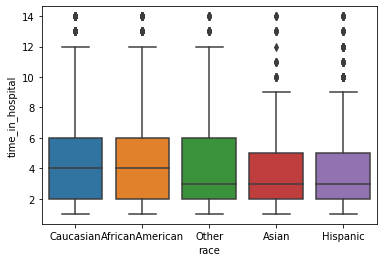

In [15]:
sns.boxplot(x='race',y='time_in_hospital',data=df_clean)

Text(0, 0.5, 'Mean Days Stayed')

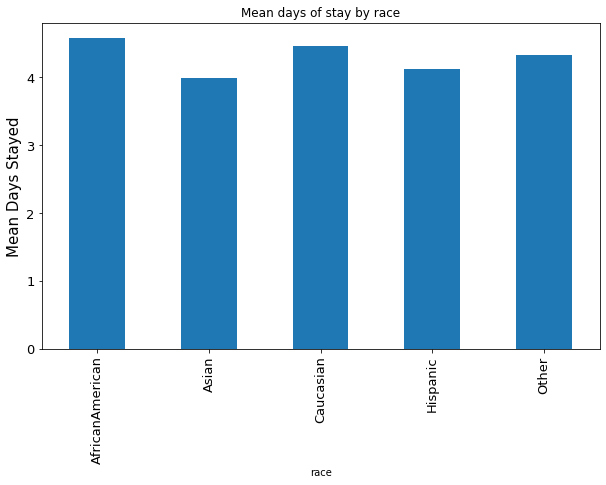

In [16]:
length_of_stay_by_race = df_clean.groupby('race')['time_in_hospital'].mean()

ax = length_of_stay_by_race.plot(kind='bar', figsize=(10,6), fontsize=13)
ax.set_alpha(0.8)
ax.set_title("Mean days of stay by race")
ax.set_ylabel("Mean Days Stayed", fontsize=15)

In [17]:
df_clean.groupby(['race'])['time_in_hospital'].count()

race
AfricanAmerican    17671
Asian                605
Caucasian          70680
Hispanic            1907
Other               1434
Name: time_in_hospital, dtype: int64

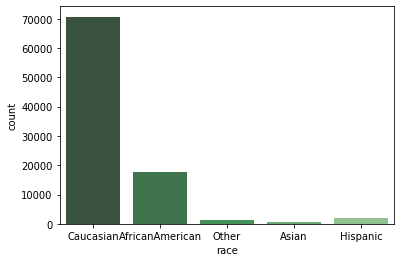

In [18]:
sns.countplot(x="race",data=df_clean,palette="Greens_d")

### Caucasians had a significantly greater amount of patients hospitalized 

In [19]:
df_clean.groupby(['age'])['time_in_hospital'].count()

age
[0-10)        158
[10-20)       626
[20-30)      1391
[30-40)      3365
[40-50)      8681
[50-60)     15745
[60-70)     20454
[70-80)     23738
[80-90)     15611
[90-100)     2528
Name: time_in_hospital, dtype: int64

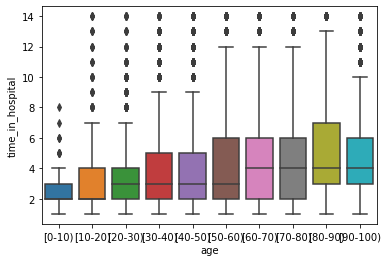

In [20]:
sns.boxplot(x='age',y='time_in_hospital',data=df_clean)

In [21]:
df_clean.groupby(['age'])['time_in_hospital'].mean()

age
[0-10)      2.569620
[10-20)     3.175719
[20-30)     3.674335
[30-40)     3.854978
[40-50)     4.095841
[50-60)     4.184567
[60-70)     4.450719
[70-80)     4.665515
[80-90)     4.880469
[90-100)    4.823180
Name: time_in_hospital, dtype: float64

### Average length of stay increases with age until it dips slightly after 90 but the largest amount of patients are between 70 - 80.

In [22]:
grouped_df = df_clean.groupby(['age','race'])['patient_nbr'].count()
print(grouped_df)

age       race           
[0-10)    AfricanAmerican       16
          Asian                  2
          Caucasian            134
          Hispanic               2
          Other                  4
[10-20)   AfricanAmerican      185
          Asian                  2
          Caucasian            408
          Hispanic              22
          Other                  9
[20-30)   AfricanAmerican      492
          Asian                  6
          Caucasian            808
          Hispanic              61
          Other                 24
[30-40)   AfricanAmerican     1109
          Asian                 14
          Caucasian           2002
          Hispanic             164
          Other                 76
[40-50)   AfricanAmerican     2511
          Asian                 50
          Caucasian           5666
          Hispanic             304
          Other                150
[50-60)   AfricanAmerican     3902
          Asian                115
          Caucasian          

In [23]:
df_clean.groupby(['metformin'])['time_in_hospital'].mean()

metformin
Down      5.100746
No        4.477592
Steady    4.330581
Up        5.437437
Name: time_in_hospital, dtype: float64

In [24]:
grouped_df = df_clean.groupby(['metformin','Stay_Length'])['patient_nbr'].count()
print(grouped_df)

metformin  Stay_Length
Down       long             104
           medium           237
           short            195
No         long           11837
           medium         27032
           short          35056
Steady     long            2365
           medium          6234
           short           8238
Up         long             227
           medium           465
           short            307
Name: patient_nbr, dtype: int64


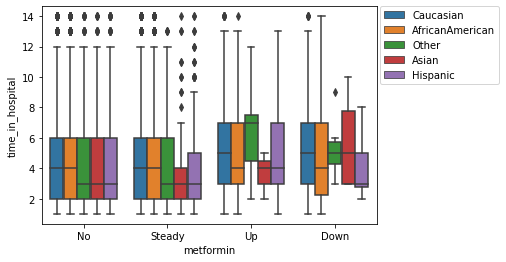

In [25]:
sns.boxplot(x='metformin',y='time_in_hospital',hue='race',data=df_clean)
plt.legend(bbox_to_anchor=(1.01, 1),
           borderaxespad=0)

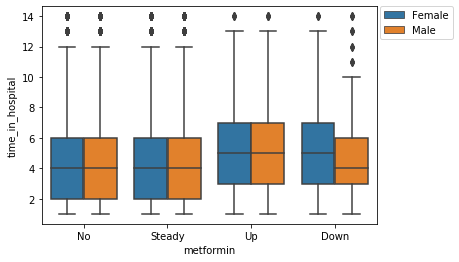

In [26]:
sns.boxplot(x='metformin',y='time_in_hospital',hue='gender',data=df_clean)
plt.legend(bbox_to_anchor=(1.01, 1),
           borderaxespad=0)

### There doesn't seem to be a significant increase or decrease in length of stay when metformin is used 

In [27]:
df_clean.groupby(['glipizide'])['time_in_hospital'].mean()

glipizide
Down      5.942529
No        4.446398
Steady    4.410504
Up        6.234722
Name: time_in_hospital, dtype: float64

In [28]:
grouped_df = df_clean.groupby(['glipizide','Stay_Length'])['patient_nbr'].count()
print(grouped_df)

glipizide  Stay_Length
Down       long             157
           medium           220
           short            145
No         long           12604
           medium         29513
           short          38580
Steady     long            1534
           medium          3917
           short           4907
Up         long             238
           medium           318
           short            164
Name: patient_nbr, dtype: int64


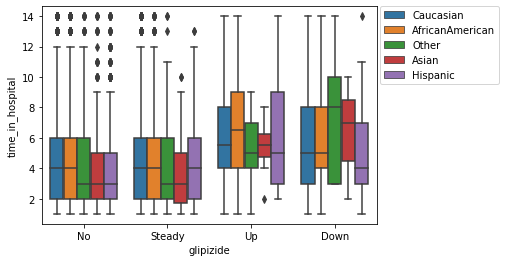

In [29]:
sns.boxplot(x='glipizide',y='time_in_hospital',hue='race',data=df_clean)
plt.legend(bbox_to_anchor=(1.01, 1),
           borderaxespad=0)

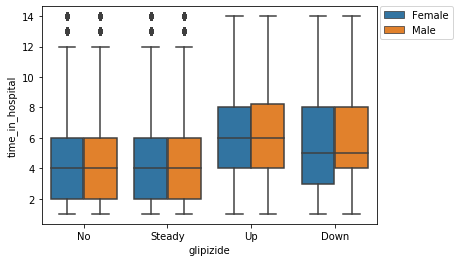

In [30]:
sns.boxplot(x='glipizide',y='time_in_hospital',hue='gender',data=df_clean)
plt.legend(bbox_to_anchor=(1.01, 1),
           borderaxespad=0)

### A change in glipizide medication either up or down seems to be correlated with a longer length of stay

In [31]:
df_clean.groupby(['insulin'])['time_in_hospital'].mean()

insulin
Down      5.044860
No        4.124196
Steady    4.433696
Up        5.400179
Name: time_in_hospital, dtype: float64

In [32]:
grouped_df = df_clean.groupby(['insulin','Stay_Length'])['patient_nbr'].count()
print(grouped_df)

insulin  Stay_Length
Down     long            2255
         medium          4304
         short           4297
No       long            5661
         medium         15025
         short          22858
Steady   long            4214
         medium         10427
         short          13208
Up       long            2403
         medium          4212
         short           3433
Name: patient_nbr, dtype: int64


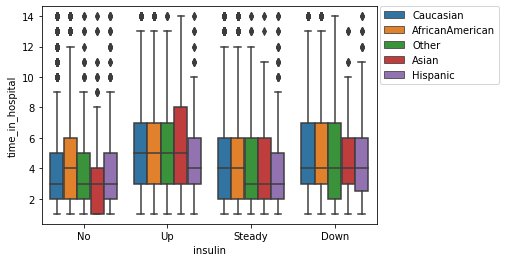

In [33]:
sns.boxplot(x='insulin',y='time_in_hospital',hue='race',data=df_clean)
plt.legend(bbox_to_anchor=(1.01, 1),
           borderaxespad=0)

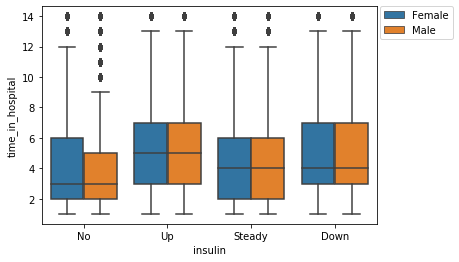

In [34]:
sns.boxplot(x='insulin',y='time_in_hospital',hue='gender',data=df_clean)
plt.legend(bbox_to_anchor=(1.01, 1),
           borderaxespad=0)

### Similar to glipizide it looks like a change in either direction of insulin results in a longer average length of stay 

## Next, I looked more closely at each race to see if there were significant differences 

In [35]:
df_clean_AfricanAmerican = df_clean[df_clean['race'] == 'AfricanAmerican']
df_clean_Asian = df_clean[df_clean['race'] == 'Asian']
df_clean_Caucasian = df_clean[df_clean['race'] == 'Caucasian']
df_clean_Hispanic = df_clean[df_clean['race'] == 'Hispanic']
df_clean_Hispanic.tail()

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,medical_specialty,number_outpatient,number_emergency,number_inpatient,metformin,glipizide,insulin,change,diabetesMed,readmitted,Stay_Length
101535,440774228,114098976,Hispanic,Female,[40-50),1,1,7,6,NaN,0,0,0,Steady,No,Steady,Ch,Yes,<30,medium
101548,440836292,122665721,Hispanic,Female,[80-90),1,3,7,13,NaN,0,0,0,Steady,No,Up,Ch,Yes,NO,long
101663,442569986,146138783,Hispanic,Female,[50-60),1,1,7,3,NaN,0,0,0,Steady,Steady,Steady,Ch,Yes,NO,short
101684,442687934,31352391,Hispanic,Male,[30-40),1,1,7,9,Family/GeneralPractice,0,0,0,No,No,Steady,No,Yes,NO,long
101726,443700206,60201405,Hispanic,Male,[30-40),3,3,1,5,NaN,0,0,0,Steady,No,No,Ch,Yes,NO,medium


In [36]:
df_clean_AfricanAmerican.groupby(['metformin'])['time_in_hospital'].mean()

metformin
Down      5.023256
No        4.630006
Steady    4.261564
Up        5.066327
Name: time_in_hospital, dtype: float64

In [37]:
df_clean_Asian.groupby(['metformin'])['time_in_hospital'].mean()

metformin
Down      5.750000
No        4.083673
Steady    3.472222
Up        3.666667
Name: time_in_hospital, dtype: float64

In [38]:
df_clean_Caucasian.groupby(['metformin'])['time_in_hospital'].mean()

metformin
Down      5.155660
No        4.452112
Steady    4.374310
Up        5.538765
Name: time_in_hospital, dtype: float64

In [39]:
df_clean_Hispanic.groupby(['metformin'])['time_in_hospital'].mean()

metformin
Down      3.812500
No        4.199724
Steady    3.807692
Up        5.142857
Name: time_in_hospital, dtype: float64

#### Decreasing or maintaining metformin seems shorten length of stay for Hispanics which is different than our overall dataset

In [40]:
df_clean_AfricanAmerican.groupby(['glipizide'])['time_in_hospital'].mean()

glipizide
Down      6.265060
No        4.569779
Steady    4.382452
Up        6.606061
Name: time_in_hospital, dtype: float64

In [41]:
df_clean_Asian.groupby(['glipizide'])['time_in_hospital'].mean()

glipizide
Down      6.333333
No        4.001931
Steady    3.618421
Up        5.375000
Name: time_in_hospital, dtype: float64

In [42]:
df_clean_Caucasian.groupby(['glipizide'])['time_in_hospital'].mean()

glipizide
Down      5.859903
No        4.432622
Steady    4.428114
Up        6.181648
Name: time_in_hospital, dtype: float64

In [43]:
df_clean_Hispanic.groupby(['glipizide'])['time_in_hospital'].mean()

glipizide
Down      5.153846
No        4.045208
Steady    4.402913
Up        6.241379
Name: time_in_hospital, dtype: float64

In [44]:
df_clean_AfricanAmerican.groupby(['insulin'])['time_in_hospital'].mean()

insulin
Down      4.919362
No        4.318889
Steady    4.503727
Up        5.364736
Name: time_in_hospital, dtype: float64

In [45]:
df_clean_Asian.groupby(['insulin'])['time_in_hospital'].mean()

insulin
Down      5.163934
No        3.403727
Steady    4.093960
Up        5.328767
Name: time_in_hospital, dtype: float64

In [46]:
df_clean_Caucasian.groupby(['insulin'])['time_in_hospital'].mean()

insulin
Down      5.088815
No        4.103991
Steady    4.428888
Up        5.431573
Name: time_in_hospital, dtype: float64

In [47]:
df_clean_Hispanic.groupby(['insulin'])['time_in_hospital'].mean()

insulin
Down      4.874477
No        3.806342
Steady    4.007273
Up        4.834043
Name: time_in_hospital, dtype: float64

#### I didn't see any other signficantly different findings 